<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/nse_pe_2_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')

# Step 1: Data Import and Cleaning
# Assume the CSV file is named 'nifty_pe_data.csv' with columns 'Date' and 'PE_Ratio'

# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_fundamental.csv")
#df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)



df=df.tail(750)
# Step 4: Rolling Analysis with a 3-Year Window (Assuming Monthly Data)
window_size = 72  # 3 years * 12 months

# Calculate rolling mean and standard deviation
df['Rolling_Mean'] = df['feat_PE'].rolling(window=window_size).mean()
df['Rolling_STD'] = df['feat_PE'].rolling(window=window_size).std()

# Compute rolling Z-scores
df['Rolling_Z_Score'] = (df['feat_PE'] - df['Rolling_Mean']) / df['Rolling_STD']

# Step 5: Setting Overvaluation and Undervaluation Thresholds
overvaluation_threshold = 2
undervaluation_threshold = -2

# Generate signals
df['Signal'] = 0
df.loc[df['Rolling_Z_Score'] > overvaluation_threshold, 'Signal'] = -1  # Overvalued
df.loc[df['Rolling_Z_Score'] < undervaluation_threshold, 'Signal'] = 1   # Undervalued



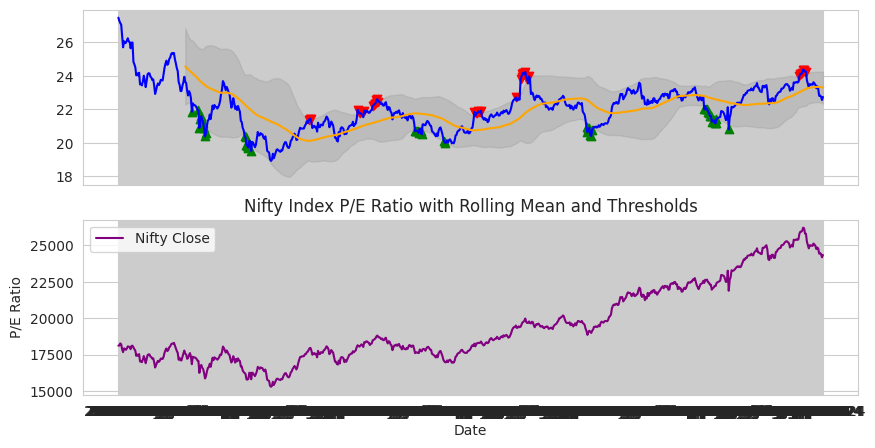

In [2]:

# Step 6: Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax1.plot(df.index, df['feat_PE'], label='P/E Ratio', color='blue')
ax1.plot(df.index, df['Rolling_Mean'], label='Rolling Mean (36 days)', color='orange')
ax1.fill_between(df.index, df['Rolling_Mean'] + overvaluation_threshold * df['Rolling_STD'],
                 df['Rolling_Mean'] - overvaluation_threshold * df['Rolling_STD'],
                 color='gray', alpha=0.2, label='Threshold Band')

# Highlight signals
ax1.scatter(df.index[df['Signal'] == -1], df['feat_PE'][df['Signal'] == -1],
            marker='v', color='red', label='Overvalued')
ax1.scatter(df.index[df['Signal'] == 1], df['feat_PE'][df['Signal'] == 1],
            marker='^', color='green', label='Undervalued')

plt.title('Nifty Index P/E Ratio with Rolling Mean and Thresholds')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
ax2.plot(df.index, df['Close'], label='Nifty Close', color='purple')
plt.legend(loc='best')
plt.show()
